In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Streamlit for UI
import streamlit as st

# Image Processing
import cv2
from PIL import Image

# OCR (Optical Character Recognition)
import pytesseract

# NLP (Natural Language Processing)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Set up NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Set up PyTesseract (Path to Tesseract executable)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
file_path = 'classification_data.csv'
df = pd.read_csv(file_path)
print(df.head())

   count_session  count_hit channelGrouping  totals_newVisits  \
0              9       1194         (Other)                 0   
1              9       1194         (Other)                 0   
2             28       1816     Paid Search                 0   
3              2        299     Paid Search                 0   
4              2        299     Paid Search                 0   

    device_browser device_operatingSystem  device_isMobile  \
0  GoogleAnalytics                Android             True   
1  GoogleAnalytics                Android             True   
2  GoogleAnalytics                Android             True   
3  GoogleAnalytics                Android             True   
4  GoogleAnalytics                Android             True   

  device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                mobile           Sharjah              25.3463  ...   
1                mobile           Sharjah              25.3463  ...   
2                mobile

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [4]:
import pandas as pd

file_path = 'classification_data.csv'
df = pd.read_csv(file_path)

# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display columns with null values and their counts
columns_with_null = null_values[null_values > 0]
print("Columns with null values:")
print(columns_with_null)

# Display the total count of null values in the DataFrame
total_null_count = null_values.sum()
print(f"\nTotal null values in the DataFrame: {total_null_count}")

Columns with null values:
Series([], dtype: int64)

Total null values in the DataFrame: 0


In [5]:
print(df.describe())

       count_session      count_hit  totals_newVisits  geoNetwork_latitude  \
count  100000.000000  100000.000000     100000.000000        100000.000000   
mean       21.532440    3671.722790          0.020380            24.918526   
std        24.002385    4627.338737          0.141297             3.352055   
min         1.000000       2.000000          0.000000           -33.924900   
25%         6.000000     971.000000          0.000000            24.453900   
50%        15.000000    2209.000000          0.000000            25.204800   
75%        29.000000    4812.000000          0.000000            25.204800   
max       270.000000   48744.000000          1.000000            59.329300   

       geoNetwork_longitude  historic_session  historic_session_page  \
count         100000.000000     100000.000000          100000.000000   
mean              54.274882       9692.262300            1875.326010   
std                7.911686      12891.629368            5222.527517   
min      

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new DataFrame to store the encoded data
df_encoded = df.copy()

# Encode and replace original columns in the new DataFrame
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df_encoded.head())

   count_session  count_hit  channelGrouping  totals_newVisits  \
0              9       1194                0                 0   
1              9       1194                0                 0   
2             28       1816                2                 0   
3              2        299                2                 0   
4              2        299                2                 0   

   device_browser  device_operatingSystem  device_isMobile  \
0               5                       1             True   
1               5                       1             True   
2               5                       1             True   
3               5                       1             True   
4               5                       1             True   

   device_deviceCategory  geoNetwork_region  geoNetwork_latitude  ...  \
0                      1                 71              25.3463  ...   
1                      1                 71              25.3463  ...   
2          

In [9]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  int32  
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  int32  
 5   device_operatingSystem  100000 non-null  int32  
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  int32  
 8   geoNetwork_region       100000 non-null  int32  
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [10]:
# Assuming df_encoded is your encoded DataFrame
df_encoded.to_csv('encoded_classification_data.csv', index=False)

In [11]:
import pandas as pd

# Read your DataFrame
file_path = 'encoded_classification_data.csv'
df_encoded = pd.read_csv(file_path)

# Specify numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Calculate the IQR for each numeric column
Q1 = df_encoded[numeric_columns].quantile(0.25)
Q3 = df_encoded[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df_encoded[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_encoded[numeric_columns] > (Q3 + 1.5 * IQR)))

# Display columns with outliers
columns_with_outliers = outliers.any()
print("Columns with outliers:")
print(columns_with_outliers[columns_with_outliers].index.tolist())

# Remove outliers
df_no_outliers = df_encoded[~outliers.any(axis=1)]

# Check if outliers were removed
print("Original DataFrame shape:", df_encoded.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Columns with outliers:
['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits', 'device_browser', 'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude', 'geoNetwork_longitude', 'historic_session', 'historic_session_page', 'avg_session_time', 'avg_session_time_page', 'single_page_rate', 'sessionQualityDim', 'last_visitId', 'latest_visit_id', 'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number', 'latest_visit_number', 'avg_visit_time', 'days_since_first_visit', 'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword', 'latest_keyword', 'num_interactions', 'bounces', 'time_on_site', 'transactionRevenue']
Original DataFrame shape: (100000, 46)
DataFrame shape after removing outliers: (17922, 46)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the dataset
df_encoded = pd.read_csv('encoded_classification_data.csv')  # Update with the correct file name

# Split the data
X = df_encoded.drop('has_converted', axis=1)
y = df_encoded['has_converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build models
models = []
for i in range(3):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    models.append({
        'model_name': f'Model {i+1}',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Display model metrics
for model in models:
    print(f"{model['model_name']} Metrics:")
    print(f"Accuracy: {model['accuracy']}")
    print(f"Precision: {model['precision']}")
    print(f"Recall: {model['recall']}")
    print(f"F1 Score: {model['f1_score']}")
    print()

Model 1 Metrics:
Accuracy: 0.9983
Precision: 0.9983506354904433
Recall: 0.9983506354904433
F1 Score: 0.9983506354904433

Model 2 Metrics:
Accuracy: 0.9983
Precision: 0.9985441133650393
Recall: 0.9981565926069661
F1 Score: 0.998350315380883

Model 3 Metrics:
Accuracy: 0.9981
Precision: 0.9983499951470446
Recall: 0.9979625497234889
F1 Score: 0.9981562348374575



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df_encoded is your encoded DataFrame
df_encoded = pd.read_csv('encoded_classification_data.csv')  # Update with the correct file name

# Split the data
X = df_encoded.drop('has_converted', axis=1)
y = df_encoded['has_converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display model metrics
print("XGBoost Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

XGBoost Model Metrics:
Accuracy: 0.99835
Precision: 0.9988347251893571
Recall: 0.9979625497234889
F1 Score: 0.9983984469788886


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df_encoded' is your encoded DataFrame
# Update 'target_column' with the actual name of your target variable
target_column = 'has_converted'

# Extract features and target
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.1434337482438849
R-squared: 0.42572375740858037


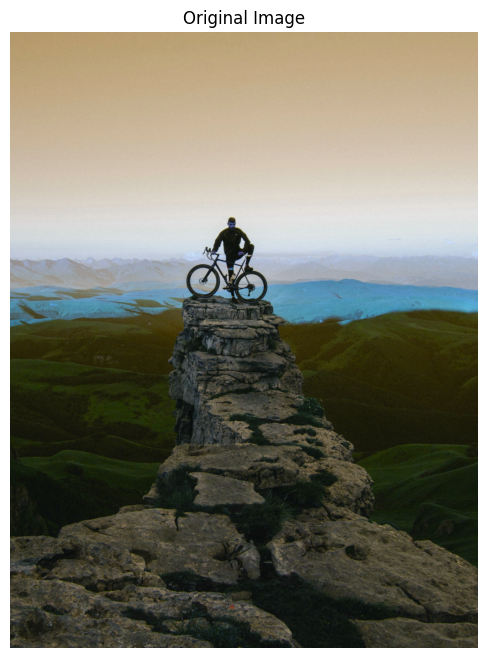

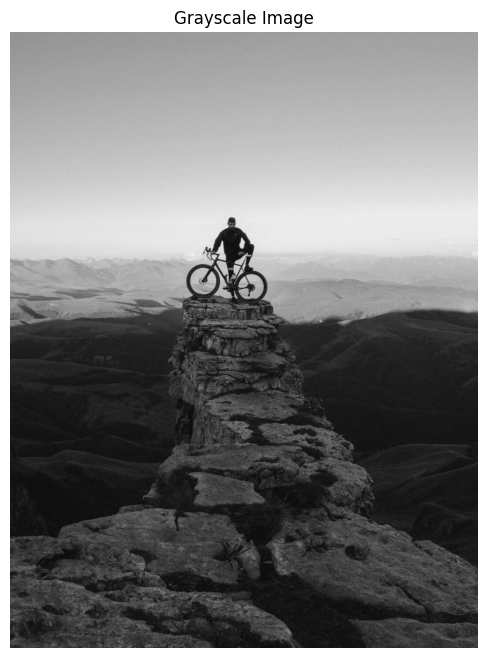

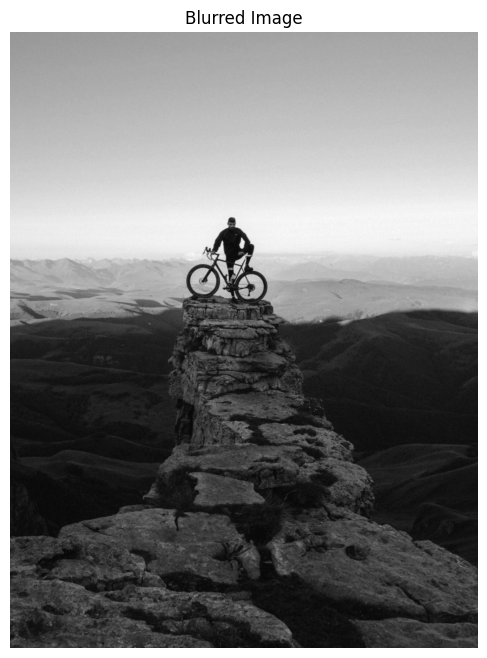

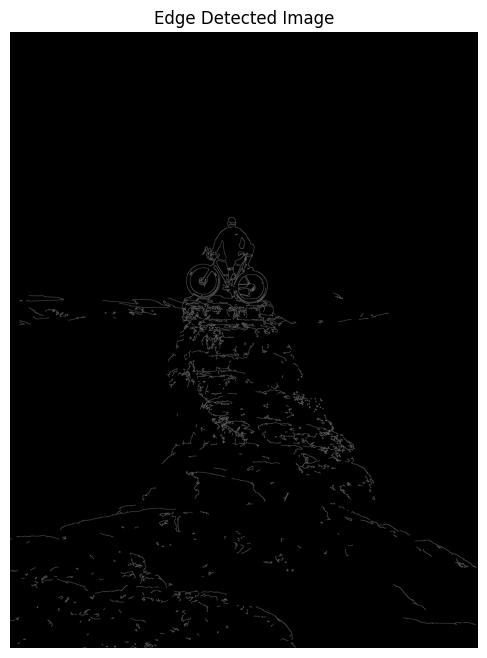

In [1]:
import cv2
import matplotlib.pyplot as plt

def read_and_process_image(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Edge Detection using Canny
    edges = cv2.Canny(blurred_image, 50, 150)

    # Display the images
    display_images([("Original Image", original_image),
                    ("Grayscale Image", gray_image),
                    ("Blurred Image", blurred_image),
                    ("Edge Detected Image", edges)])

def display_images(image_list):
    for title, image in image_list:
        plt.figure(figsize=(8, 8))
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    # Provide the local path to your image
    image_path = r"C:\Users\ELCOT\Downloads\dmitrii-vaccinium-ByUAo3RpA6c-unsplash.jpg"

    # Call the function to read and process the image
    read_and_process_image(image_path)


In [1]:
import spacy
from textblob import TextBlob

def nlp_preprocess(text):
    # Load spaCy English language model
    nlp = spacy.load("en_core_web_sm")

    # Tokenization
    tokens = nlp(text)
    token_output = [token.text for token in tokens]

    # Lemmatization
    lemmatized_output = [token.lemma_ for token in tokens]

    # Named Entity Recognition (NER)
    entities = [(ent.text, ent.label_) for ent in tokens.ents]

    return token_output, lemmatized_output, entities

def find_keywords(text):
    # Load spaCy English language model
    nlp = spacy.load("en_core_web_sm")

    # Extracting keywords using POS (Part of Speech) tagging
    keywords = [token.text for token in nlp(text) if token.pos_ in ['NOUN', 'PROPN']]

    return keywords

def sentiment_analysis(text):
    # Using TextBlob for sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment

    return sentiment

if __name__ == "__main__":
    # Input the bunch of text
    input_text = "Your input text goes here."

    # NLP Pre-processing
    token_output, lemmatized_output, entities = nlp_preprocess(input_text)

    print("Tokenization:", token_output)
    print("Lemmatization:", lemmatized_output)
    print("Named Entity Recognition:", entities)

    # Find Keywords
    keywords = find_keywords(input_text)
    print("Keywords:", keywords)

    # Sentiment Analysis
    sentiment_result = sentiment_analysis(input_text)
    print("Sentiment Analysis (Polarity, Subjectivity):", sentiment_result)


Tokenization: ['Your', 'input', 'text', 'goes', 'here', '.']
Lemmatization: ['your', 'input', 'text', 'go', 'here', '.']
Named Entity Recognition: []
Keywords: ['input', 'text']
Sentiment Analysis (Polarity, Subjectivity): Sentiment(polarity=0.0, subjectivity=0.0)
